# Natural Language Processing

In this workshop, we will:
- use of **regular expression** to extract information from text
- use advanced natural language processing

## Regular expressions

Regular expressions (or regex) are widely used to extract specific pattern from text. Here are a few components of regular expressions:
- `\d`: a digit, similar to `[0-9]`
- `\s`: a whitespace
- `[a-z]`: a list of character from lowercase 'a' to lowercase 'z'
- `.`: any character
- `\.`: a period (you use the backslash to escape character with a special meaning in regex)
- word and letters can simply be typed as it

In addition, the following modifiers are available to indicate the occurence of the character or group of characters:
- `?` matches 0 or 1 occurence, `disks?` will match `disk` and `disks`
- `+` matches 1 or more occurences, `\d+` will match `1`, `12`, and `123`
- `{2, 5}` matches between 2 and 5 occurences
- `*` matches as the maximum number of occurences found

Groups and boolean operators:
- `()` parenthesis are used to define a group to be extracted
- `|` is the OR operator, to define if we match this pattern or another one.


These are only a subset of components. More can be found in [this cheatsheet](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf).

In [2]:
# import relevant package
import re

### Example
Let's extract the annual rainfall from this sentence.

In [12]:
# extract precipitation number
text = 'Annual rainfall of 800 mm are expected in this region much higher than the 105 mm'
re.findall('\d+', text)

['800', '105']

You can see that all sub string that match the regex are found (`re.findall()` will find all matches). However, if the annual precipitation number contains decimal, the regex will capture its decimal part separately.

In [61]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('\d+', text)

['800', '105', '3']

Note that we want to match the period character ('.'), for this we need to escape it with a backslash as the period means 'any character' by default in regular expression.

In [62]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('\d+\.\d+', text)

['105.3']

This new expression matched the decimal format but not the integer format anymore. To enable matching both numbers, we will use the modifier `?` to test accept both with and without dot notation.

In [63]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('\d+\.?\d+?', text)

['800', '105.3']

A neater example would be to group the '.' and decimal part between *non-capturing parenthesis* (i.e. `(:?<your regex here>)`).

In [97]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('\d+(?:\.\d+)?', text)

['800', '105.3']

Now let's also match the units ('mm') expressed in the text. Note that the unit are separated by a space (`\s` in regex).

In [64]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('\d+\.?\d+?\smm', text)

['800 mm', '105.3 mm']

We've now extracted our number of interest and it's unit. However, they are still together. To extract them selectively, we can use capturing parenthesis `(<regex here>)`.

In [65]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 105.3 mm.'
re.findall('(\d+\.?\d+?)\s(mm)', text)

[('800', 'mm'), ('105.3', 'mm')]

What is different unit are present like 'mm' and 'cm'? In this case, we will use brackets and the OR operator `|` to match both.

In [66]:
text = 'Annual rainfall of 800 mm are expected in this region, much higher than 15.3 cm.'
re.findall('(\d+\.?\d+?)\s(mm|cm)', text)

[('800', 'mm'), ('15.3', 'cm')]

### Exercice 1
Extract all latitude and longitude from the following text. Use two regular expression, one for the latitude, one for the longitude.

In [73]:
text = '''The site was located in Nuevo, Italy (35.61 N, 8.74 E), not for from the main research station.
The soil type is a Haplic Luvisol with 16 % clay and 40 % silt. A similar experiment was carried out in South America
site of Loca Pulco (20.43 S, 40.2 W). Local Pulco soil type is composed of Cambisols with 20 % clay and 35.2 % sand.'''
print('latitude:', re.findall('(\d+\.?\d+?)\s(N|S)', text))
print('longitude:', re.findall('(\d+\.?\d+?)\s(E|W)', text))

latitude: [('35.61', 'N'), ('20.43', 'S')]
longitude: [('8.74', 'E'), ('40.2', 'W')]


Extract all WRB soil types from the following text. An approach similar to the way we handle different units above can be used.

In [75]:
text = '''The site was located in Nuevo, Italy (35.61 N, 8.74 W), not for from the main research station.
The soil type is a Haplic Luvisol with 16 % clay and 40 % silt on most of the field with the Northern part being
an Eutric Cambisol. A similar experiment was carried out in South America site of Loca Pulco
(20.43 S, 40.2 W). Local Pulco soil type is composed of Cambisols with 20 % clay and 35.2 % sand.'''
re.findall('(Luvisols?|Cambisols?)', text)

['Luvisol', 'Cambisol', 'Cambisols']

Extract clay, silt and sand content from the following text in a unique regex.

In [44]:
text = '''The site was located in Nuevo, Italy (35.61 N, 8.74 W), not for from the main research station.
The soil type is a Haplic Luvisol with 16 % clay and 40 % silt. A similar experiment was carried out in South America
site of Loca Pulco (20.43 S, 40.2 W). Local Pulco soil type is composed of Cambisols with 20 % clay and 35.2 % sand.'''
re.findall('(\d+\.?\d+?)\s%\s(clay|silt|sand)', text)

[('16', 'clay'), ('40', 'silt'), ('20', 'clay'), ('35.2', 'sand')]

### Exercice 2
Extract all instances of tension-disk diameter. You can use more then one regex if needed. Make your regex specific enough to not match the other numbers of the text.

In [96]:
text = '''We use a combination of three different tension-disk infiltrometers:
the first one with 7.5 cm radius, the second one with 140 mm diameter and the last one has a disk of 5 cm diameter.
The annual rainfall at the site was of 800 mm per year. 
A fine layer of 0.5 cm sand was applied before putting the instrument in contact with the soil.
'''
re.findall('(\d+.?\d+?)\s(mm|cm)\s(diameter|radius)', text)

[('7.5', 'cm', 'radius'), ('140', 'mm', 'diameter')]

## NLP with spacy
SpaCy is a Python package designed for production NLP. It embeds several pre-trained rules-based (like regex or similar) and statistical language dependant models to extract the nature and functions of words. NLP process often infludes the following steps:

In [54]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")  # load language specific (en) pre-trained model
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# example or nature and functions identification from sentence.
text = "In the short term, tillage operations significantly increased K"
sent = nlp(text)
displacy.render(sent, style='dep', options={'compact': True, 'distance': 90})

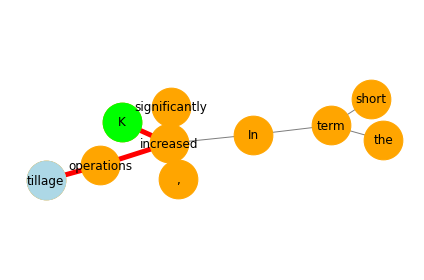

In [98]:
# build dependency graph and show shortest dependency path
fig, ax = plt.subplots()
node_size = 1500

# find shortest dependency path (SDP)
edges = []
for token in sent:
    for child in token.children:
        edges.append((token.i, child.i))
G = nx.Graph(edges)
sdp = nx.shortest_path(G, 
                       source=5,
                       target=9)

# draw network
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)
nx.draw_networkx_nodes(G, pos, alpha=1, ax=ax, node_color='orange', node_size=node_size)
nx.draw_networkx_labels(G, pos, labels=dict(zip(np.arange(len(sent)), [a for a in sent])),
                        font_family="sans-serif", ax=ax, font_size=12)

# draw sdp
path_edges = list(zip(sdp, sdp[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=sdp[:1], node_color='lightblue', node_size=node_size)
nx.draw_networkx_nodes(G, pos, nodelist=sdp[-1:], node_color='lime', node_size=node_size)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=5)

plt.axis("off")
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
fig.tight_layout()